___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be some of the challenges you might encounter.

Also, this project aims to increase your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for multi-class classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data*
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_validate




warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

In [2]:
import sklearn

sklearn.__version__

'1.0.2'

In [3]:
import xgboost

xgboost.__version__

'2.0.1'

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [4]:
df_male =   pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding="latin-1")

In [5]:
df_female = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq")

### Demographic/Administrative Data:

- subjectid: A unique number for each participant.
- SubjectBirthLocation: Where the participant was born (U.S. state or foreign country).
- SubjectNumericRace: A code indicating the participant's race.
- Ethnicity: Self-reported ethnicity.
- DODRace: Department of Defense Race code.
- Gender: Male or Female.
- Age: Age in years.
- Heightin: Self-reported height in inches.
- Weightlbs: Self-reported weight in pounds.
- WritingPreference: Whether the participant prefers to write with their right hand, left hand, or has no preference.
- Date: Date the participant was measured.
- Installation: U.S. Army location where the measurement took place.
- Component: Whether the participant is from the Army National Guard, Army Reserve, or Regular Army.
- Branch: The branch of the army they belong to (e.g., Combat Arms, Combat Support).
- PrimaryMOS: Primary Military Occupational Specialty.



### Anthropometric Data (Body Measurements):
This section contains 93 different measurements of the participant's body. All measurements are in millimeters, except for weight which is in kilograms. Some examples include:

- abdominalextensiondepthsitting: Measurement of the abdominal extension depth while sitting.
- acromialheight: Height of the acromion (a bony process on the scapula).
- anklecircumference: Circumference of the ankle.
- axillaheight: Height of the axilla (armpit).
- balloffootlength: Length of the ball of the foot.
... and many more body measurements.

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [6]:
# check out the male data 
df_male.head(10)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [7]:
# check out the male data 
df_female.head(10)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [8]:
#one column seems to have different in bot dataframe. Rename it
df_female = df_female.rename(columns={"SubjectId": "subjectid"})
df_female.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [9]:
# find the shape for both dataframes
print('Male Dataframe Shape:',df_male.shape)
print('Female Dataframe Shape:',df_female.shape)

Male Dataframe Shape: (4082, 108)
Female Dataframe Shape: (1986, 108)


The number of column are same thus the data can be concatenated by rows 

In [10]:
# concatenate the data 
df = pd.concat([df_male, df_female], axis=0, ignore_index=True)
print('Concatenated Dataframe shape: ', df.shape)
df.head()

Concatenated Dataframe shape:  (6068, 108)


,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [11]:
#check for null values in all the colmns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [12]:
# Check for null values in each column
null_counts = df.isnull().sum()
null_counts

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

4647 null values are found in the ethnicity column and thus ethnicity column have to be removed 

In [13]:
df_cleaned = df.drop('Ethnicity', axis = 1 )
df_cleaned.shape

(6068, 107)

In [14]:
df_cleaned.isnull().sum()

subjectid                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
balloffootcircumference           0
balloffootlength                  0
biacromialbreadth                 0
bicepscircumferenceflexed         0
bicristalbreadth                  0
bideltoidbreadth                  0
bimalleolarbreadth                0
bitragionchinarc                  0
bitragionsubmandibulararc         0
bizygomaticbreadth                0
buttockcircumference              0
buttockdepth                      0
buttockheight                     0
buttockkneelength                 0
buttockpopliteallength            0
calfcircumference                 0
cervicaleheight                   0
chestbreadth                      0
chestcircumference                0
chestdepth                        0
chestheight                       0
crotchheight                

1421 rows remain after removing rows with null values 

In [15]:
# also check for duplicated rows
df_cleaned[df_cleaned.duplicated()]

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,WritingPreference


In [16]:
#reset index
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,

There are no duplicated rows. Thus no cleaning is required. 

In [17]:
# Both DODRace and SubjectNumericRace provide same information thus remmove 1 column 
df_cleaned[["DODRace","SubjectNumericRace"]]


,DODRace,SubjectNumericRace
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
...,...,...
6063,3,3
6064,3,3
6065,2,2
6066,3,3


In [18]:
df_cleaned = df_cleaned.drop('SubjectNumericRace', axis = 1)
df_cleaned.shape

(6068, 106)

In [19]:
#drop Date and subjectid column as they dont provide any meaningful information
df_cleaned = df_cleaned.drop(['subjectid','Date'], axis = 1)
df_cleaned.shape

(6068, 104)

In [20]:
#statistcal representaion of the numeric data 
df_cleaned.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace,Age,Heightin,Weightlbs
count,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000
mean,246.468688,1406.161338,327.374423,224.891397,1299.608767,244.19265,194.754614,399.204186,340.934245,274.735003,490.754450,72.252637,324.896506,306.636124,139.723467,1020.084707,241.619974,870.152274,608.999176,497.097561,386.04120,1477.490442,282.859097,1022.098879,251.738464,1252.013184,825.110086,621.851681,351.315920,35.132169,62.625906,22.263349,240.911338,785.914469,98.865359,263.033619,338.766645,295.010712,552.075972,467.007086,1102.049275,84.953362,203.861404,189.286585,152.182762,570.035267,196.334871,332.622940,70.756922,348.385465,385.733355,1040.059492,632.602011,412.037739,432.340804,475.512854,540.124918,483.239618,69.580422,406.479895,119.518787,375.441167,413.834707,1388.404417,113.916612,416.187047,259.192320,1129.362228,354.083553,145.072676,898.107779,866.665293,576.899967,1763.794825,1714.406065,1402.949077,1099.587179,622.198748,176.336355,789.695616,458.244562,129.617996,882.739947,1630.309492,460.524720,317.750000,914.501483,229.674028,377.003790,1031.501154,797.093935,169.002966,830.059987,1.615030,29.761206,68.257251,174.749670
std,37.400106,79.091048,20.720018,16.051833,72.022286,16.84502,13.516368,30

above table give the statistical inforamtion of the numeric data 

In [21]:
#statistcal representaion of the non numeric data 
df_cleaned.describe(include='object')

,Gender,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
count,6068,6068,6068,6068,6068,6068,6068
unique,2,12,3,3,285,152,3
top,Male,Camp Shelby,Regular Army,Combat Service Support,11B,California,Right hand
freq,4082,1160,3140,3174,671,446,5350


above table give the statistical inforamtion of the categorical data

<AxesSubplot:xlabel='DODRace', ylabel='count'>

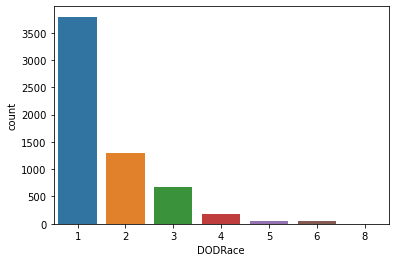

In [22]:
# Analyse few of the features 
sns.countplot(df_cleaned["DODRace"])

DODRace – Department of Defense Race; a single digit indicating a subject’s 
self-reported preferred single race where selecting multiple races is not an option. 
This variable is intended to be comparable to the Defense Manpower Data Center 
demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 
5 = Native American, 6 = Pacific Islander, 8 = Other.

From the chart it is visible that most of the data is for White while the least is for Others

Through some in depth through extra sources it was found out that it is recommended to remove the data DODRace where the number of cunt is less than 500. Thus 

In [23]:
df_cleaned = df_cleaned[(df_cleaned['DODRace'] == 1) | (df_cleaned['DODRace'] == 2) | (df_cleaned['DODRace'] == 3)]
df_cleaned

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,Fort Hood,Regular Army,Combat Support,68W,New York,1,35,68,160,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,Fort Hood,Regular Army,Combat Support,68W,New York,2,42,68,205,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,31,66,175,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,1

In [24]:
# repeating column with different units is removed
df_cleaned[['Weightlbs','weightkg']]


,Weightlbs,weightkg
0,180,815
1,160,726
2,205,929
3,175,794
4,213,946
...,...,...
6063,180,832
6064,150,717
6065,168,762
6066,133,632


In [25]:
df_cleaned = df_cleaned.drop('weightkg',axis = 1)
df_cleaned.shape

(5769, 103)

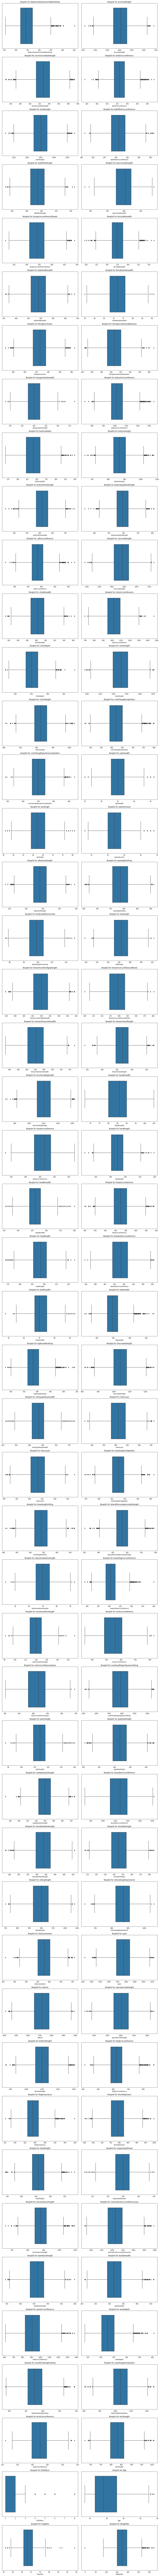

In [26]:
# boxplot for checking values and finding outliers in different features
# Get the list of feature names
numeric_columns = df_cleaned.select_dtypes(include=['number'])
feature_names = numeric_columns.columns

# Calculate the number of rows and columns needed for the grid
num_features = len(feature_names)
num_rows = (num_features + 1) // 2

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Loop through the features and plot horizontal boxplots
for i, feature in enumerate(feature_names):
    row = i // 2
    col = i % 2
    
    sns.boxplot(x=df[feature], ax=axes[row, col], orient='h')  # Set orientation to horizontal
    axes[row, col].set_title(f'Boxplot for {feature}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

From the boxplot it is visible that Weightlbs has a outlier with a weight == 0 which is not possible thus remove that row 

In [27]:
df_cleaned = df_cleaned[df_cleaned['Weightlbs'] != 0]
df_cleaned.shape

(5768, 103)

<AxesSubplot:xlabel='Weightlbs'>

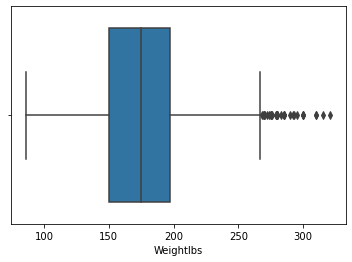

In [28]:
#plot boxplot
sns.boxplot(df_cleaned['Weightlbs'])

In [29]:
# reset the index
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned.shape

(5768, 103)

In [30]:
# heightin is comparable to stature as per the documentation
df_cleaned[['stature','Heightin']]

,stature,Heightin
0,1776,71
1,1702,68
2,1735,68
3,1655,66
4,1914,77
...,...,...
5763,1687,67
5764,1613,63
5765,1644,66
5766,1616,63


In [31]:
df_cleaned = df_cleaned.drop('stature', axis = 1)
df_cleaned.shape

(5768, 102)

heightin is comparable to stature as per the documentation. Thus we remove stature

In [32]:
# df_cleaned[DODRace]
#checking the datatype of the features
df_cleaned.dtypes

abdominalextensiondepthsitting     int64
acromialheight                     int64
acromionradialelength              int64
anklecircumference                 int64
axillaheight                       int64
balloffootcircumference            int64
balloffootlength                   int64
biacromialbreadth                  int64
bicepscircumferenceflexed          int64
bicristalbreadth                   int64
bideltoidbreadth                   int64
bimalleolarbreadth                 int64
bitragionchinarc                   int64
bitragionsubmandibulararc          int64
bizygomaticbreadth                 int64
buttockcircumference               int64
buttockdepth                       int64
buttockheight                      int64
buttockkneelength                  int64
buttockpopliteallength             int64
calfcircumference                  int64
cervicaleheight                    int64
chestbreadth                       int64
chestcircumference                 int64
chestdepth      

In [33]:
# change datatype
df_cleaned['DODRace'] = df_cleaned['DODRace'].astype('object')
df_cleaned["DODRace"] = df_cleaned.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic"})
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

As per documentation DODRace appears to a non numeric feature hence change its dtype to object

In [34]:
#statistcal representaion of the non numeric data 
df_cleaned.describe(include='object')

,Gender,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,DODRace,WritingPreference
count,5768,5768,5768,5768,5768,5768,5768,5768
unique,2,12,3,3,281,136,3,3
top,Male,Camp Shelby,Regular Army,Combat Service Support,11B,California,White,Right hand
freq,3898,1111,2954,3021,641,417,3792,5087


From the above decription its clear that most of the unique values are for SubjectsBirthLocation and PrimaryMOS. Both these values might be problematic as they significantly increase the feature set size when encoding will be done for categorical values. Thus their is a need to reduce their size through some mean.

In [35]:
#uniue values for SubjectsBirthLocation
df_cleaned['SubjectsBirthLocation'].unique()

array(['North Dakota', 'New York', 'Wisconsin', 'North Carolina',
       'Kentucky', 'Mississippi', 'Romania', 'Arkansas', 'Maryland',
       'Arizona', 'South Carolina', 'California', 'Washington',
       'Virginia', 'Texas', 'Illinois', 'Puerto Rico', 'Georgia',
       'Colombia', 'El Salvador', 'Michigan', 'Missouri', 'Philippines',
       'Florida', 'Pennsylvania', 'West Virginia', 'Nebraska', 'Indiana',
       'Montana', 'Colorado', 'Mexico', 'Minnesota', 'Iowa', 'Peru',
       'Oklahoma', 'Massachusetts', 'District of Columbia', 'Ohio',
       'Louisiana', 'Oregon', 'Tennessee', 'Alaska', 'Connecticut',
       'Guam', 'Netherlands', 'Idaho', 'New Mexico', 'Belgium', 'Maine',
       'New Jersey', 'Morocco', 'Alabama', 'Canada', 'Germany', 'Hawaii',
       'Kansas', 'British Virgin Islands', 'Utah', 'US Virgin Islands',
       'Nevada', 'Delaware', 'Jamaica', 'Cameroon', 'New Hampshire',
       'Nicaragua', 'United Kingdom', 'Ukraine', 'Sierra Leone', 'Cuba',
       'Rhode Island',

In [36]:
# This is a dictionary of states and their regions.
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}
# This is a dictionary of the countries and their continents.
countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}


In [37]:
# Replace values in the DataFrame
df_cleaned['SubjectsBirthLocation'] = df_cleaned['SubjectsBirthLocation'].replace(states_by_region)
df_cleaned['SubjectsBirthLocation'] = df_cleaned['SubjectsBirthLocation'].replace(countries_by_continent)
df_cleaned['SubjectsBirthLocation'].value_counts()

South            1988
Midwest          1401
West              799
Northeast         619
Mid Atlantic      445
North America     263
Europe            146
South America      43
Africa             35
Asia               25
Oceania             4
Name: SubjectsBirthLocation, dtype: int64

Through above replacement the number of unique values of SubjectsBirthLocation is reduce from 136 to 11

In [38]:
# PrimaryMOS unique values
df_cleaned['PrimaryMOS'].unique()

array(['19D', '68W', '88M', '92G', '91L', '91D', '92F', '25L', '91B',
       '25B', '42A', '15T', '15G', '15N', '15B', '92W', '14S', '14J',
       '94M', '94T', '25F', '25U', '25C', '15F', '92A', '92Y', '14E',
       '35F', '89B', '11C', '91M', '13F', '19K', '15U', '13B', '21B',
       '91A', '35G', '15W', '915A', '25N', '25Q', '94F', '25W', '250N',
       '25A', '35M', '351L', '351M', '25S', '31B', '31E', '12B', '12N',
       '21E', '12A', '68E', '74D', '68H', '68A', '68J', '92S', '68K',
       '70K', '88N', '91C', '70B', '91P', '13D', '13R', '27D', '11B',
       '79S', '91J', '91W', '91H', '11Z', '11A', '13A', '31A', '56A',
       '35D', '00Z', '35L', '43B', '27A', '14T', '35P', '36B', '91X',
       '91G', '19Z', '12Z', '18Z', '14Z', '92Z', '35X', '88Z', '68Z',
       '68S', '15P', '13Z', '56M', '79R', '91Z', '15Z', '35Z', '38B',
       '25Z', '19X', '25X', '51C', '21X', '46Z', '21Z', '92B', '42F',
       '89A', '13M', '21W', '12R', '12W', '12Y', '25P', '18F', '18A',
       '11H', '0

These features dont provide any key information thus PrimaryMOS should be dropped 

In [39]:
df_cleaned = df_cleaned.drop('PrimaryMOS',axis=1)
df_cleaned.shape

(5768, 101)

In [40]:
df_cleaned.describe(include='object')

,Gender,Installation,Component,Branch,SubjectsBirthLocation,DODRace,WritingPreference
count,5768,5768,5768,5768,5768,5768,5768
unique,2,12,3,3,11,3,3
top,Male,Camp Shelby,Regular Army,Combat Service Support,South,White,Right hand
freq,3898,1111,2954,3021,1988,3792,5087


<AxesSubplot:xlabel='Installation', ylabel='count'>

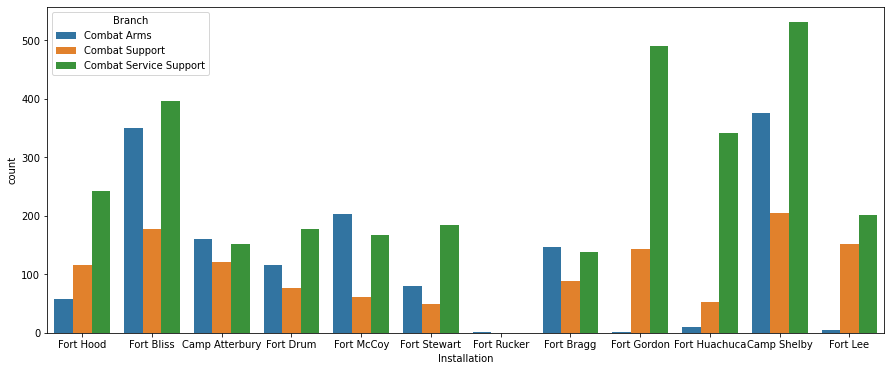

In [41]:
# Analyse WritingPreference
plt.figure(figsize=(15,6))
sns.countplot(df_cleaned['Installation'], hue = df_cleaned['Branch'])

from the above chart is clear that most of the data is of Combat Service support while the highest data is recorded Camp Shelby

<AxesSubplot:xlabel='WritingPreference', ylabel='count'>

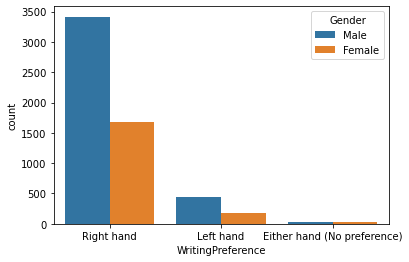

In [42]:
# Analyse WritingPreference
sns.countplot(df_cleaned['WritingPreference'], hue = df_cleaned['Gender'])

Most of the people are right handed regardless of their gender

<AxesSubplot:xlabel='Component', ylabel='count'>

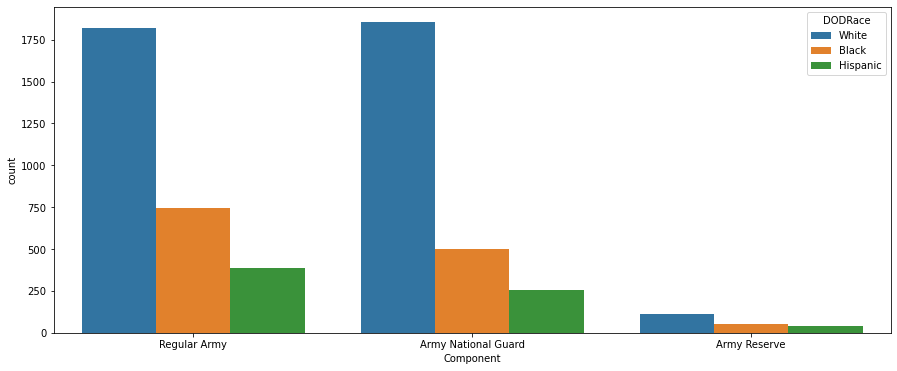

In [43]:
# Analyse WritingPreference
plt.figure(figsize=(15,6))
sns.countplot(df_cleaned['Component'], hue = df_cleaned['DODRace'])

From the chart above it is clear that most of the people are white and join Regular Army. While the least are Hispanic and are part of Army reserves.

In [44]:
df_temp = df_cleaned.corr()

count = "done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                # print(f"multicolinearity alert in between {col} - {i}")
print("Number of strong corelated features:", count)
df_temp

Number of strong corelated features: done


,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Age,Heightin,Weightlbs
abdominalextensiondepthsitting,1.000000,0.351968,0.312921,0.518910,0.280843,0.456738,0.332612,0.417648,0.691308,0.505856,0.724503,0.366179,0.530988,0.626319,0.519675,0.739499,0.840854,0.245907,0.476412,0.323684,0.658518,0.337383,0.627929,0.825860,0.778441,0.296264,0.189067,0.463334,0.199892,0.242256,0.403624,0.139812,0.264180,0.279786,0.439149,0.345266,0.345920,0.628400,0.729093,0.306121,0.415258,0.419335,0.457271,0.301291,0.361754,0.363353,0.329386,0.502545,0.437201,0.595200,0.554732,0.256422,0.258776,0.599379,0.542202,0.275276,0.348573,0.220827,0.348375,0.674410,0.294462,0.657011,0.627334,0.321116,0.310540,0.149503,0.280223,0.637910,0.287187,0.187660,0.274322,0.422637,0.276915,0.318252,0.352728,0.293489,0.730042,0.724730,0.389456,0.260762,0.186372,0.230985,0.728556,0.572044,0.858969,0.939651,0.958716,0.579498,0.147156,0.546949,0.383217,0.385649,0.289892,0.793928
acromialheight,0.351968,1.000000,0.868297,0.504662,0.987119,0.693957,0.797787,0.733269,0.522686,0.401609,0.628456,0.705027,0.570122,0.583909,0.506783,0.283067,0.341766,0.866977,0.811420,0.746750,0.409360,0.983955,0.542568,0.530666,0.280854,0.959297,0.898976,0.341901,0.410681,0.358671,0.439668,0.278221,0.292452,0.813600,0.671955,0.826803,0.846517,0.635416,0.572360,0.862537,0.894036,0.708491,0.717042,0.752935,0.406534,0.431682,0.548335,0.797399,0.447987,0.207787,0.100151,0.932228,0.337689,0.526442,0.591989,0.895904,0.931757,0.856502,0.677865,0.327355,0.539866,0.627889,0.651783,0.867363,0.709297,0.893392,0.821757,0.689799,0.889056,0.542267,0.821479,0.872363,0.879796,0.883976,0.984717,0.945021,0.277201,0.445221,0.803685,0.890898,0.327459,0.883717,0.733660,0.727869,0.438565,0.405166,0.362341,0.607035,0.930949,0.733588,0.921266,0.082829,0.943886,0.698339
acromionradialelength,0.312921,0.868297,1.000000,0.416052,0.857403,0.604209,0.725975,0.667393,0.452577,0.343457,0.559997,0.614839,0.519638,0.514491,0.456083,0.247027,0.292017,0.814139,0.775389,0.735224,0.354908,0.865844,0.466432,0.470354,0.265920,0.841862,0.850493,0.247222,0.306642,0.311031,0.370538,0.233791,-0.004907,0.639196,0.587431,0.748880,0.818104,0.556947,0.501062,0.836310,0.820206,0.623884,0.632051,0.719796,0.354258,0.389741,0.483165,0.709314,0.438924,0.182305,0.084483,0.858565,0.339990,0.469476,0.540616,0.831066,0.861190,0.812205,0.554543,0.284458,0.475109,0.546377,0.568785,0.791053,0.665

In [45]:
# collinear columns 
df_col = pd.DataFrame([feature, collinear], index=["feature","collinear"]).T
df_col

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
5,acromialheight,iliocristaleheight
6,acromialheight,kneeheightsitting
7,acromialheight,suprasternaleheight
8,acromialheight,tenthribheight
9,acromialheight,waistheightomphalion


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [46]:
# original data 
df_cleaned.shape

(5768, 101)

In [47]:
X = df_cleaned.drop(columns=["DODRace"])
y = df_cleaned.DODRace

In [48]:
#convert the categorical feature to numeric
X = pd.get_dummies(data=X,drop_first=True)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [50]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4614, 122)
Train target shape   :  (4614,)
Test features shape  :  (1154, 122)
Test target shape    :  (1154,)


In [51]:
X_train.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Age,Heightin,Weightlbs,Gender_Male,Installation_Camp Shelby,Installation_Fort Bliss,Installation_Fort Bragg,Installation_Fort Drum,Installation_Fort Gordon,Installation_Fort Hood,Installation_Fort Huachuca,Installation_Fort Lee,Installation_Fort McCoy,Installation_Fort Rucker,Installation_Fort Stewart,Component_Army Reserve,Component_Regular Army,Branch_Combat Service Support,Branch_Combat Support,SubjectsBirthLocation_Asia,SubjectsBirthLocation_Europe,SubjectsBirthLocation_Mid Atlantic,SubjectsBirthLocation_Midwest,SubjectsBirthLocation_North America,SubjectsBirthLocation_Northeast,SubjectsBirthLocation_Oceania,SubjectsBirthLocation_South,SubjectsBirthLocation_South America,SubjectsBirthLocation_West,WritingPreference_Left hand,WritingPreference_Right hand
335,295,1410,335,245,1291,270,204,442,343,276,524,75,336,305,146,1042,258,909,622,498,400,1498,301,1124,258,1268,845,633,332,34,68,21,200,798,109,277,341,297,600,466,1171,90,212,195,146,566,195,349,70,355,387,1014,665,455,484,488,545,490,73,412,121,388,439,1437,116,421,262,1221,371,169,902,902,587,1817,1400,1085,623,193,801,472,130,921,1659,491,336,976,266,370,1018,181,804,24,69,180,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
5676,216,1260,305,211,1175,219,172,326,282,272,421,69,297,266,129,993,207,763,550,458,363,1323,266,898,230,1120,734,627,341,30,56,19,261,740,91,235,289,252,463,402,963,75,180,163,142,531,177,295,61,350,390,928,600,322,345,430,494,459,61,383,110,307,355,1189,103,389,213,945,318,122,850,725,505,1515,1263,997,596,152,687,428,120,787,1547,402,293,815,200,338,942,148,766,29,62,130,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
639,271,1467,335,245,1364,257,205,430,360,269,520,76,333,317,145,1117,270,875,658,539,407,1556,296,1106,264,1324,863,641,409,36,60,27,264,826,103,281,365,301,609,498,1168,90,210,197,156,572,199,352,78,378,416,1071,540,479,502,504,567,493,70,422,135,389,428,1530,119,429,276,1236,361,167,944,928,608,1904,1473,1135,691,188,873,477,133,899,1728,472,355,992,243,447,1082,182,853,20,72,207,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4713,230,1316,282,185,1231,205,171,343,265,287,431,64,290,276,125,965,226,813,548,451,313,1350,262,957,243,1133,741,573,342,33,55,23,263,735,84,228,305,237,464,410,1023,73,175,165,144,526,180,281,61,333,381,961,535,350,365,416,474,418,65,354,111,306,363,1259,104,367,228,965,308

In [52]:
#normalize the data using minmax scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.562249  , 0.49162011, 0.59722222, ..., 0.        , 1.        ,
        0.        ],
       [0.24497992, 0.2122905 , 0.38888889, ..., 0.        , 0.        ,
        1.        ],
       [0.46586345, 0.59776536, 0.59722222, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.49799197, 0.39478585, 0.31944444, ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 0.53817505, 0.625     , ..., 0.        , 0.        ,
        1.        ],
       [0.26104418, 0.29608939, 0.35416667, ..., 0.        , 1.        ,
        0.        ]])

In [53]:
from sklearn.decomposition import PCA

# Create a PCA instance and fit it to the scaled data
pca = PCA(n_components=0.95)  # Choose the number of components that explain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 'X_pca' now contains the reduced feature set

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

Explained Variance Ratio: [0.26016759 0.07648774 0.07287083 0.06640955 0.05222011 0.04327132
 0.04025901 0.03774917 0.02932853 0.02589568 0.02436245 0.02010812
 0.01819414 0.01798671 0.01579153 0.01465273 0.013607   0.01228991
 0.01191766 0.01136926 0.01003087 0.00982961 0.0086879  0.00723678
 0.00628957 0.00603145 0.00590765 0.00538162 0.00485734 0.00433147
 0.00369578 0.00364223 0.00317942 0.00276476 0.00261667 0.00250721]


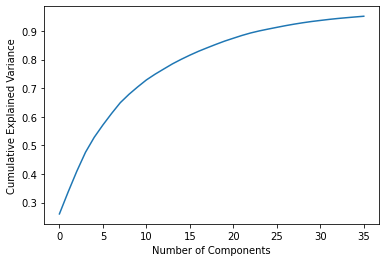

In [54]:
import numpy as np
import matplotlib.pyplot as plt

cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

35 Component explain almost 95% of the data thus used

In [55]:
X_train = X_train_pca.copy()
X_test = X_test_pca.copy()

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to check if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity check of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [56]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    cnf_test = confusion_matrix(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))    
    print(classification_report(y_test, y_pred))
    
    print("Train_Set")
    cnf_train = confusion_matrix(y_train, y_train_pred)
    print(cnf_train)
    print(classification_report(y_train, y_train_pred))
    return cnf_test ,cnf_train, y_pred

def logistic_train(X_train,y_train):
    log_model = LogisticRegression()

    log_model.fit(X_train,y_train)

    return log_model

In [57]:
#training a vanilla Logistic regression model 
log_model = logistic_train(X_train, y_train)

In [58]:
#training a vanilla Logistic regression model 
cnf_test,cnf_train, y_pred_lr = eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[225   6  22]
 [ 10  58  66]
 [ 15  13 739]]
              precision    recall  f1-score   support

       Black       0.90      0.89      0.89       253
    Hispanic       0.75      0.43      0.55       134
       White       0.89      0.96      0.93       767

    accuracy                           0.89      1154
   macro avg       0.85      0.76      0.79      1154
weighted avg       0.88      0.89      0.88      1154

Train_Set
[[ 912   21  112]
 [  43  215  286]
 [  54   39 2932]]
              precision    recall  f1-score   support

       Black       0.90      0.87      0.89      1045
    Hispanic       0.78      0.40      0.53       544
       White       0.88      0.97      0.92      3025

    accuracy                           0.88      4614
   macro avg       0.86      0.75      0.78      4614
weighted avg       0.87      0.88      0.87      4614



Test: 


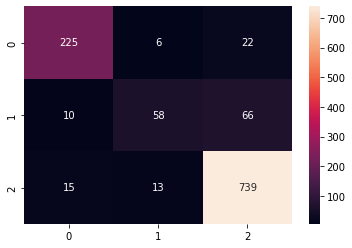

Train: 


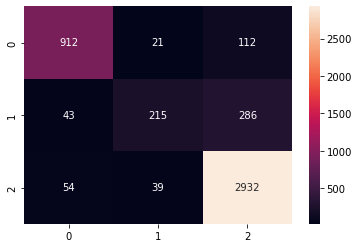

In [59]:
#correlation matrix for train and test
print('Test: ')
sns.heatmap(cnf_test, annot=True,fmt='.0f')
plt.show()
print('Train: ')
sns.heatmap(cnf_train, annot=True,fmt='.0f')
plt.show()

### Logistic Model GridsearchCV

In [60]:
#cross validation 
f1score_model = make_scorer(f1_score, average="weighted")
log_model = LogisticRegression()
scores = cross_val_score(log_model, X_train, y_train, cv = 5, scoring = f1score_model, n_jobs = -1)
print([round(i, 4) for i in scores], "\n")
print(f" f1score_model : %{scores.mean()*100:.2f}, std : %{scores.std()*100:.3f} \n")

[0.8616, 0.8542, 0.8726, 0.8628, 0.8678] 

 f1score_model : %86.38, std : %0.619 



In [61]:
#Grid Search
f1_score_Hispanic = make_scorer(f1_score, average=None, labels=["Hispanic"])

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Create a GridSearchCV instance
grid_log_model = GridSearchCV(logistic_regression, param_grid, cv=5, scoring=f1_score_Hispanic)

# Fit the model
grid_log_model.fit(X_train,y_train)

# Get the best parameters and best estimator
best_params = grid_log_model.best_params_
best_params

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

In [62]:
#model evaluation 
cnf_test,cnf_train, y_pred_lr = eval_metric(grid_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[226   6  21]
 [ 10  60  64]
 [ 16  16 735]]
              precision    recall  f1-score   support

       Black       0.90      0.89      0.90       253
    Hispanic       0.73      0.45      0.56       134
       White       0.90      0.96      0.93       767

    accuracy                           0.88      1154
   macro avg       0.84      0.77      0.79      1154
weighted avg       0.88      0.88      0.88      1154

Train_Set
[[ 918   23  104]
 [  46  226  272]
 [  55   48 2922]]
              precision    recall  f1-score   support

       Black       0.90      0.88      0.89      1045
    Hispanic       0.76      0.42      0.54       544
       White       0.89      0.97      0.92      3025

    accuracy                           0.88      4614
   macro avg       0.85      0.75      0.78      4614
weighted avg       0.87      0.88      0.87      4614



Test: 


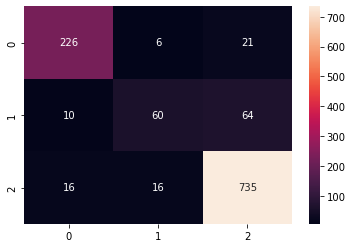

Train: 


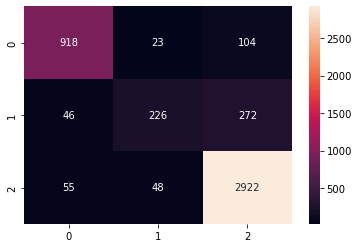

In [63]:
#correlation matrix for train and test
print('Test: ')
sns.heatmap(cnf_test, annot=True,fmt='.0f')
plt.show()
print('Train: ')
sns.heatmap(cnf_train, annot=True,fmt='.0f')
plt.show()

In [64]:
def multiclass_roc_diagram(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

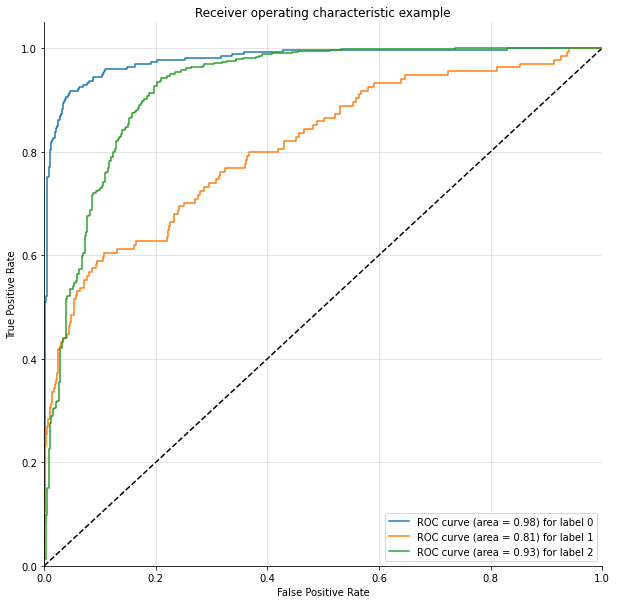

In [65]:
multiclass_roc_diagram(grid_log_model, X_test, y_test, n_classes=3, figsize=(10, 10));


## 2. SVC

### Vanilla SVC model

In [66]:
def svc_train(X_train,y_train):
    svc_model = SVC()

    svc_model.fit(X_train,y_train)

    return svc_model

In [67]:
#train the SVC model 
svc_model = svc_train(X_train,y_train)

In [68]:
#eval SVC model
svc_cnf_test,svc_cnf_train, y_pred_svc = eval_metric(svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[217   2  34]
 [ 11  40  83]
 [  8   7 752]]
              precision    recall  f1-score   support

       Black       0.92      0.86      0.89       253
    Hispanic       0.82      0.30      0.44       134
       White       0.87      0.98      0.92       767

    accuracy                           0.87      1154
   macro avg       0.87      0.71      0.75      1154
weighted avg       0.87      0.87      0.86      1154

Train_Set
[[ 938    6  101]
 [  37  168  339]
 [  18   13 2994]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92      1045
    Hispanic       0.90      0.31      0.46       544
       White       0.87      0.99      0.93      3025

    accuracy                           0.89      4614
   macro avg       0.90      0.73      0.77      4614
weighted avg       0.89      0.89      0.87      4614



SVC Test: 


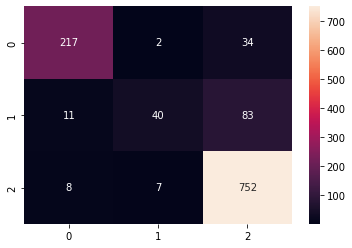

SVC Train: 


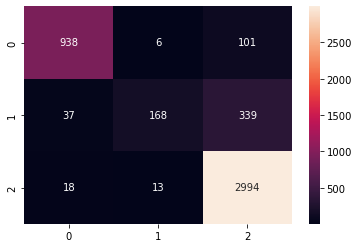

In [69]:
#correlation matrix for train and test
print('SVC Test: ')
sns.heatmap(svc_cnf_test, annot=True,fmt='.0f')
plt.show()
print('SVC Train: ')
sns.heatmap(svc_cnf_train, annot=True,fmt='.0f')
plt.show()

###  SVC Model GridsearchCV

In [70]:
#cross validation 
f1score_model = make_scorer(f1_score, average="weighted")
svc_model = SVC()
scores = cross_val_score(svc_model, X_train, y_train, cv = 5, scoring = f1score_model, n_jobs = -1)
print([round(i, 4) for i in scores], "\n")
print(f" f1score_model : %{scores.mean()*100:.2f}, std : %{scores.std()*100:.3f} \n")

[0.8427, 0.837, 0.8406, 0.827, 0.8432] 

 f1score_model : %83.81, std : %0.597 



In [71]:
#Grid Search
f1_score_Hispanic = make_scorer(f1_score, average=None, labels=["Hispanic"])

#parameter grid for searching
param_grid = {'decision_function_shape' : ['ovr','ovo'],
              'gamma': ["scale", "auto", 1,0.1,0.01],
              'kernel': ['rbf'],
              'C': np.linspace(100,500,5)
             }

#Model 
svc_model = SVC()
grid_svc_model = GridSearchCV(svc_model, param_grid, verbose=3, scoring=f1_score_Hispanic, refit=True,n_jobs=-1)
grid_svc_model



GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([100., 200., 300., 400., 500.]),
                         'decision_function_shape': ['ovr', 'ovo'],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01],
                         'kernel': ['rbf']},
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [72]:
#fit the model
grid_svc_model.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([100., 200., 300., 400., 500.]),
                         'decision_function_shape': ['ovr', 'ovo'],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01],
                         'kernel': ['rbf']},
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [73]:
#get best param 
grid_svc_model.best_params_

{'C': 500.0, 'decision_function_shape': 'ovr', 'gamma': 0.01, 'kernel': 'rbf'}

Test_Set
[[225   6  22]
 [ 14  56  64]
 [ 22  17 728]]
              precision    recall  f1-score   support

       Black       0.86      0.89      0.88       253
    Hispanic       0.71      0.42      0.53       134
       White       0.89      0.95      0.92       767

    accuracy                           0.87      1154
   macro avg       0.82      0.75      0.77      1154
weighted avg       0.87      0.87      0.87      1154

Train_Set
[[ 958   19   68]
 [  33  252  259]
 [  36   28 2961]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1045
    Hispanic       0.84      0.46      0.60       544
       White       0.90      0.98      0.94      3025

    accuracy                           0.90      4614
   macro avg       0.89      0.79      0.82      4614
weighted avg       0.90      0.90      0.89      4614

Test: 


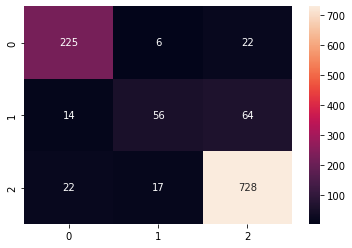

Train: 


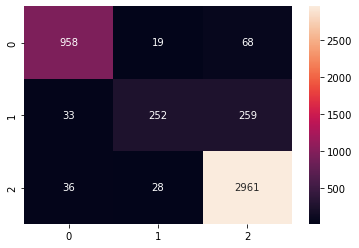

In [74]:
#model evaluation 
svc_cnf_test,svc_cnf_train, y_pred_svc = eval_metric(grid_svc_model, X_train, y_train, X_test, y_test)
#correlation matrix for train and test
print('Test: ')
sns.heatmap(svc_cnf_test, annot=True,fmt='.0f')
plt.show()
print('Train: ')
sns.heatmap(svc_cnf_train, annot=True,fmt='.0f')
plt.show()

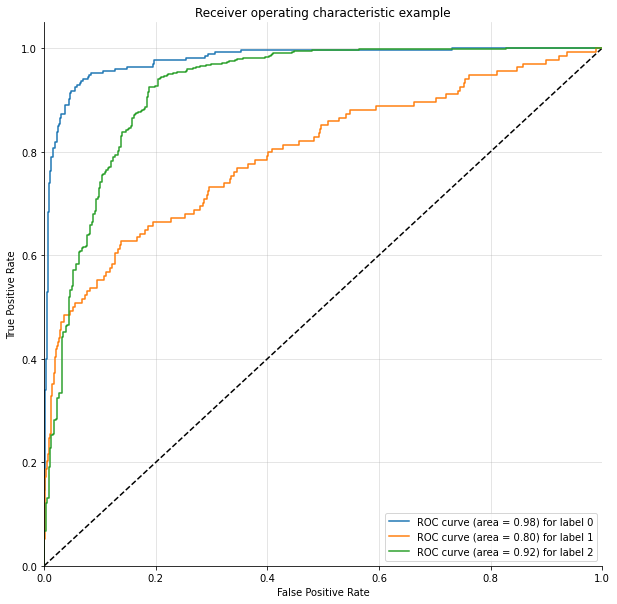

In [75]:
multiclass_roc_diagram(grid_svc_model, X_test, y_test, n_classes=3, figsize=(10, 10));


## 3. RF

### Vanilla RF Model

In [76]:
def rf_train(X_train,y_train):
    rf_model = RandomForestClassifier()

    rf_model.fit(X_train,y_train)

    return rf_model

#train the rf model 
rf_model = rf_train(X_train,y_train)

In [77]:
#eval RF model
rf_cnf_test, rf_cnf_train, y_pred_rf = eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[190   5  58]
 [ 10  39  85]
 [ 13   5 749]]
              precision    recall  f1-score   support

       Black       0.89      0.75      0.82       253
    Hispanic       0.80      0.29      0.43       134
       White       0.84      0.98      0.90       767

    accuracy                           0.85      1154
   macro avg       0.84      0.67      0.71      1154
weighted avg       0.85      0.85      0.83      1154

Train_Set
[[1045    0    0]
 [   0  544    0]
 [   0    0 3025]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1045
    Hispanic       1.00      1.00      1.00       544
       White       1.00      1.00      1.00      3025

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614



RF Test: 


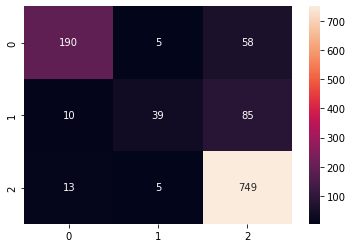

RF Train: 


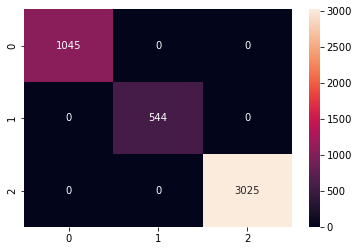

In [78]:
#correlation matrix for train and test
print('RF Test: ')
sns.heatmap(rf_cnf_test, annot=True,fmt='.0f')
plt.show()
print('RF Train: ')
sns.heatmap(rf_cnf_train, annot=True,fmt='.0f')
plt.show()

### RF Model GridsearchCV

In [79]:
#cross validation 
f1score_model = make_scorer(f1_score, average="weighted")
rf_model = RandomForestClassifier()
scores = cross_val_score(rf_model, X_train, y_train, cv = 5, scoring = f1score_model, n_jobs = -1)
print([round(i, 4) for i in scores], "\n")
print(f" f1score_model : %{scores.mean()*100:.2f}, std : %{scores.std()*100:.3f} \n")

[0.8041, 0.8039, 0.7993, 0.8091, 0.8128] 

 f1score_model : %80.58, std : %0.467 



In [80]:
#Grid Search
f1_score_Hispanic = make_scorer(f1_score, average=None, labels=["Hispanic"])

#parameter grid for searching
param_grid = {'n_estimators':[400,500],
             'criterion': ["gini","entropy"],
             'max_depth':[8,10,18,24],
             'min_samples_split':[16,20,24]}

#Model 
rf_model = RandomForestClassifier()
grid_rf_model = GridSearchCV(rf_model, param_grid, verbose=3, scoring=f1_score_Hispanic, refit=True,n_jobs=-1)
grid_rf_model



GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 18, 24],
                         'min_samples_split': [16, 20, 24],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [81]:
#fit the model
grid_rf_model.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 18, 24],
                         'min_samples_split': [16, 20, 24],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [82]:
#get best param 
grid_rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 24,
 'min_samples_split': 20,
 'n_estimators': 500}

Test_Set
[[180   5  68]
 [  9  33  92]
 [ 15   4 748]]
              precision    recall  f1-score   support

       Black       0.88      0.71      0.79       253
    Hispanic       0.79      0.25      0.38       134
       White       0.82      0.98      0.89       767

    accuracy                           0.83      1154
   macro avg       0.83      0.64      0.69      1154
weighted avg       0.83      0.83      0.81      1154

Train_Set
[[ 973    2   70]
 [  19  271  254]
 [   2    6 3017]]
              precision    recall  f1-score   support

       Black       0.98      0.93      0.95      1045
    Hispanic       0.97      0.50      0.66       544
       White       0.90      1.00      0.95      3025

    accuracy                           0.92      4614
   macro avg       0.95      0.81      0.85      4614
weighted avg       0.93      0.92      0.92      4614

Test: 


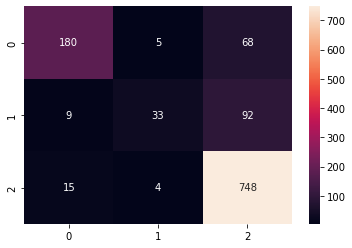

Train: 


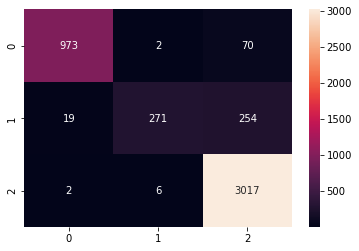

In [83]:
#model evaluation 
rf_cnf_test, rf_cnf_train, y_pred_rf = eval_metric(grid_rf_model, X_train, y_train, X_test, y_test)
#correlation matrix for train and test
print('Test: ')
sns.heatmap(rf_cnf_test, annot=True,fmt='.0f')
plt.show()
print('Train: ')
sns.heatmap(rf_cnf_train, annot=True,fmt='.0f')
plt.show()

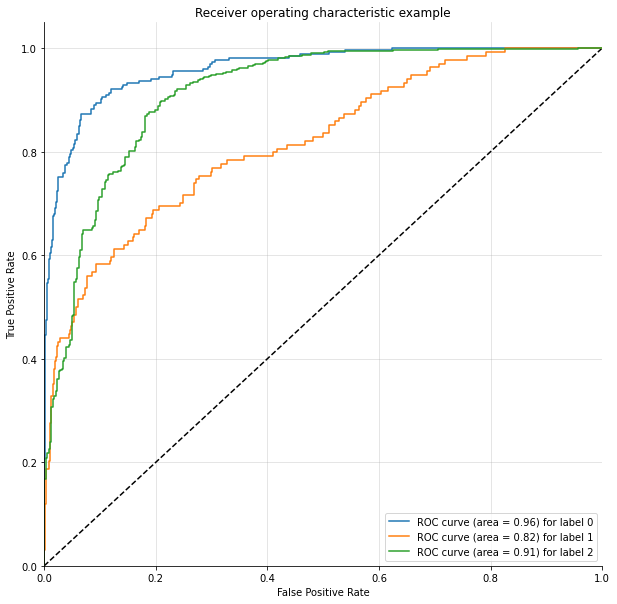

In [84]:
def multiclass_roc_diagram_for_tree(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()


multiclass_roc_diagram_for_tree(grid_rf_model, X_test, y_test, n_classes=3, figsize=(10, 10));


## 4. XGBoost

### Vanilla XGBoost Model

In [85]:
#converted the categorical label to numeric
# y_train_x = y_train.map({ "White": 0, "Black": 1,"Hispanic":2})
# y_test_x = y_test.map({ "White": 0, "Black": 1,"Hispanic":2})

In [86]:
from xgboost import XGBClassifier

def xg_train(X_train,y_train):
    xg_model =  XGBClassifier()

    xg_model.fit(X_train,y_train)

    return xg_model

#train the xg model
y_train_x = y_train.copy()
y_test_x = y_test.copy()

y_train_x = y_train_x.map({ "White": 0, "Black": 1,"Hispanic":2})
y_test_x = y_test_x.map({ "White": 0, "Black": 1,"Hispanic":2})

xg_model = xg_train(X_train,y_train_x)

In [87]:
#eval xg model
xg_cnf_test, xg_cnf_train, y_pred_xg = eval_metric(xg_model, X_train, y_train_x, X_test, y_test_x)

Test_Set
[[731  15  21]
 [ 32 216   5]
 [ 65  10  59]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       767
           1       0.90      0.85      0.87       253
           2       0.69      0.44      0.54       134

    accuracy                           0.87      1154
   macro avg       0.82      0.75      0.78      1154
weighted avg       0.86      0.87      0.86      1154

Train_Set
[[3025    0    0]
 [   0 1045    0]
 [   0    0  544]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3025
           1       1.00      1.00      1.00      1045
           2       1.00      1.00      1.00       544

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614



XG Test: 


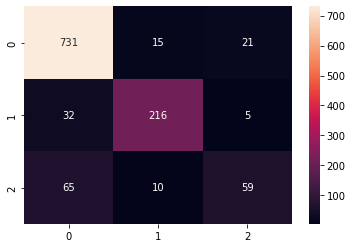

XG Train: 


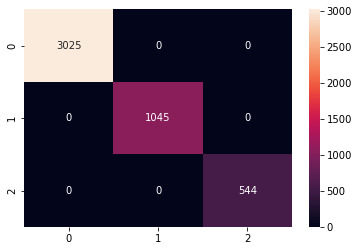

In [88]:
#correlation matrix for train and test
print('XG Test: ')
sns.heatmap(xg_cnf_test, annot=True,fmt='.0f')
plt.show()
print('XG Train: ')
sns.heatmap(xg_cnf_train, annot=True,fmt='.0f')
plt.show()

### XGBoost Model GridsearchCV

In [89]:
#cross validation 
f1score_model = make_scorer(f1_score, average="weighted")
xg_model = XGBClassifier()
scores = cross_val_score(xg_model, X_train, y_train_x, cv = 5, scoring = f1score_model, n_jobs = -1)
print([round(i, 4) for i in scores], "\n")
print(f" f1score_model : %{scores.mean()*100:.2f}, std : %{scores.std()*100:.3f} \n")

[0.8422, 0.8392, 0.8392, 0.8292, 0.8428] 

 f1score_model : %83.85, std : %0.487 



In [90]:
#Grid Search
f1_score_Hispanic = make_scorer(f1_score, average=None, labels=["Hispanic"])

#parameter grid for searching
param_grid = {"n_estimators":[150,200, 350],
              'max_depth':[3,7,10],
              "learning_rate": [0.1, 0.2, 0.3]}

#Model 
xg_model = XGBClassifier()
grid_xg_model = GridSearchCV(xg_model, param_grid, verbose=3, scoring=f1_score_Hispanic, refit=True,n_jobs=-1)
grid_xg_model



GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimator

In [91]:
#fit the model
grid_xg_model.fit(X_train,y_train_x)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/opt/conda/lib/python3.9/site-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimator

In [92]:
#get best param 
grid_xg_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}

Test_Set
[[741  15  11]
 [ 38 205  10]
 [ 72  10  52]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       767
           1       0.89      0.81      0.85       253
           2       0.71      0.39      0.50       134

    accuracy                           0.86      1154
   macro avg       0.82      0.72      0.76      1154
weighted avg       0.86      0.86      0.85      1154

Train_Set
[[2995   20   10]
 [  84  947   14]
 [ 240   21  283]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3025
           1       0.96      0.91      0.93      1045
           2       0.92      0.52      0.67       544

    accuracy                           0.92      4614
   macro avg       0.93      0.81      0.85      4614
weighted avg       0.92      0.92      0.91      4614

Test: 


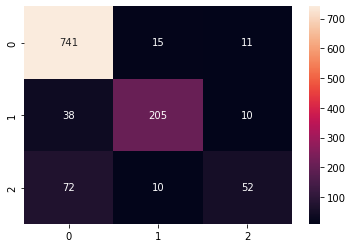

Train: 


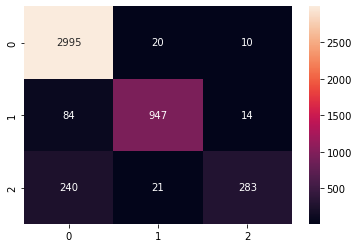

In [93]:
#model evaluation 
xg_cnf_test, xg_cnf_train, y_pred_xg = eval_metric(grid_xg_model, X_train, y_train_x, X_test, y_test_x)
#correlation matrix for train and test
print('Test: ')
sns.heatmap(xg_cnf_test, annot=True,fmt='.0f')
plt.show()
print('Train: ')
sns.heatmap(xg_cnf_train, annot=True,fmt='.0f')
plt.show()

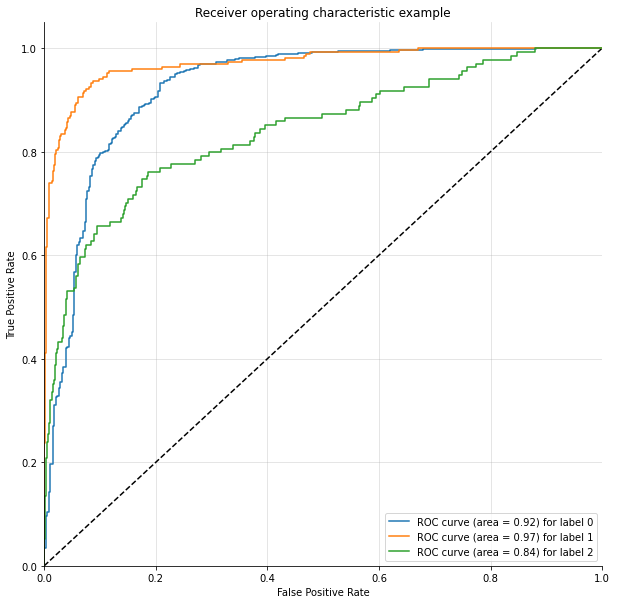

In [94]:
multiclass_roc_diagram_for_tree(grid_xg_model, X_test, y_test_x, n_classes=3, figsize=(10, 10));


## Comparing Models

In [95]:
def eval_metric_latest(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass classification

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted') 
    
    #precision
    precision = precision_score(y_test, y_pred, average='weighted') 

    return recall ,f1, precision

lr_recall, lr_f1, lr_precision = eval_metric_latest(grid_log_model, X_train, y_train, X_test, y_test)

svc_recall ,svc_f1, svc_precision = eval_metric_latest(grid_svc_model, X_train, y_train, X_test, y_test)

rf_recall ,rf_f1, rf_precision = eval_metric_latest(grid_rf_model, X_train, y_train, X_test, y_test)

xg_recall ,xg_f1, xg_precision = eval_metric_latest(grid_xg_model, X_train, y_train_x, X_test, y_test_x)


[Text(0, 0, '0.877'),
 Text(0, 0, '0.866'),
 Text(0, 0, '0.857'),
 Text(0, 0, '0.832')]

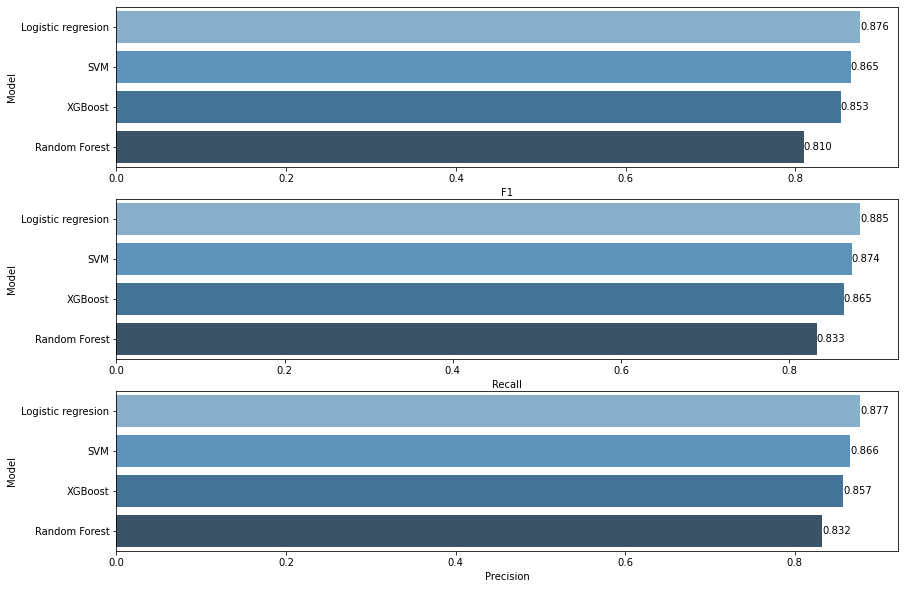

In [96]:
compare = pd.DataFrame(
    {
        "Model": [ "Logistic regresion", "SVM", "Random Forest", "XGBoost"],
        "F1": [lr_f1 ,svc_f1, rf_f1, xg_f1],
        "Recall": [lr_recall ,svc_recall, rf_recall, xg_recall],
        "Precision": [lr_precision ,svc_precision, rf_precision, xg_precision],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="Precision", ascending=False)
ax = sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")



---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
# conda install -c conda-forge imbalanced-learn

In [97]:
# equalizes or approximates minority classes to the majority class.
from imblearn.over_sampling import SMOTE

# equalizes or converges the majority class to the minority class
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline


In [98]:
# smote for oversampling minority class and undersampling the minority class 
over_class = SMOTE(sampling_strategy={"Hispanic": 1000})
under_class  = RandomUnderSampler(sampling_strategy={"White":2500})
smote_steps = [('o', over_class), ('u', under_class)]
smote_pipeline = imbpipeline(steps=smote_steps)
X_resampled_smote, y_resampled_smote = smote_pipeline.fit_resample(X_train, y_train)

In [99]:
#get unique values before/after smote
print('Before: ',y_train.value_counts())
print('After: ',y_resampled_smote.value_counts())

Before:  White       3025
Black       1045
Hispanic     544
Name: DODRace, dtype: int64
After:  White       2500
Black       1045
Hispanic    1000
Name: DODRace, dtype: int64


## Logistic Regression Over/Under Sampling

In [100]:
#Grid Search
f1_score_Hispanic = make_scorer(f1_score, average=None, labels=["Hispanic"])

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Create a logistic regression model
logistic_regression_smote = LogisticRegression()

# Create a GridSearchCV instance
grid_log_model_smote = GridSearchCV(logistic_regression_smote, param_grid, cv=5, scoring=f1_score_Hispanic)

# Fit the model
grid_log_model_smote.fit(X_resampled_smote,y_resampled_smote)

# Get the best parameters and best estimator
best_params = grid_log_model_smote.best_params_
best_params

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

In [101]:
#model evaluation 
cnf_test_smote,cnf_train_smote, y_pred_lr_smote = eval_metric(grid_log_model_smote, X_train, y_train, X_test, y_test)

Test_Set
[[228  10  15]
 [ 12  78  44]
 [ 20  45 702]]
              precision    recall  f1-score   support

       Black       0.88      0.90      0.89       253
    Hispanic       0.59      0.58      0.58       134
       White       0.92      0.92      0.92       767

    accuracy                           0.87      1154
   macro avg       0.80      0.80      0.80      1154
weighted avg       0.87      0.87      0.87      1154

Train_Set
[[ 926   35   84]
 [  37  309  198]
 [  68  165 2792]]
              precision    recall  f1-score   support

       Black       0.90      0.89      0.89      1045
    Hispanic       0.61      0.57      0.59       544
       White       0.91      0.92      0.92      3025

    accuracy                           0.87      4614
   macro avg       0.80      0.79      0.80      4614
weighted avg       0.87      0.87      0.87      4614



Test: 


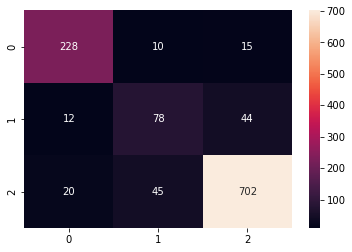

Train: 


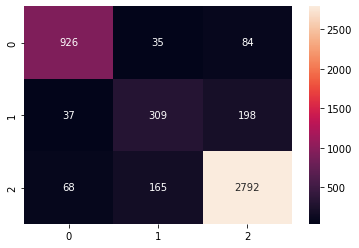

In [102]:
#correlation matrix for train and test
print('Test: ')
sns.heatmap(cnf_test_smote, annot=True,fmt='.0f')
plt.show()
print('Train: ')
sns.heatmap(cnf_train_smote, annot=True,fmt='.0f')
plt.show()

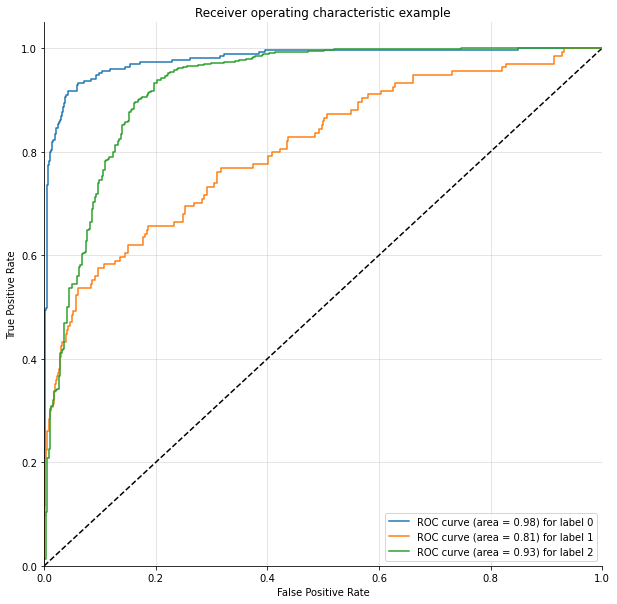

In [103]:
multiclass_roc_diagram(grid_log_model_smote, X_test, y_test, n_classes=3, figsize=(10, 10));


## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [105]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
mat_lr = matthews_corrcoef(y_test, y_pred_lr)
mat_svc = matthews_corrcoef(y_test, y_pred_svc)
mat_rf = matthews_corrcoef(y_test, y_pred_rf)
mat_xg = matthews_corrcoef(y_test_x, y_pred_xg)
mat_lr_smote = matthews_corrcoef(y_test, y_pred_lr_smote)

Signature: matthews_corrcoef(y_true, y_pred, *, sample_weight=None)
Docstring:
Compute the Matthews correlation coefficient (MCC).

The Matthews correlation coefficient is used in machine learning as a
measure of the quality of binary and multiclass classifications. It takes
into account true and false positives and negatives and is generally
regarded as a balanced measure which can be used even if the classes are of
very different sizes. The MCC is in essence a correlation coefficient value
between -1 and +1. A coefficient of +1 represents a perfect prediction, 0
an average random prediction and -1 an inverse prediction.  The statistic
is also known as the phi coefficient. [source: Wikipedia]

Binary and multiclass labels are supported.  Only in the binary case does
this relate to information about true and false positives and negatives.
See references below.

Read more in the :ref:`User Guide <matthews_corrcoef>`.

Parameters
----------
y_true : array, shape = [n_samples]
    Ground 

In [106]:
#matthews_corrcoef Score
mat_lr, mat_svc, mat_rf,mat_xg, mat_lr_smote

(0.760220260754793,
 0.7388573724170809,
 0.641454239383297,
 0.7150371037798611,
 0.7464776342643814)

In [107]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
ck_lr = cohen_kappa_score(y_test, y_pred_lr)
ck_svc = cohen_kappa_score(y_test, y_pred_svc)
ck_rf = cohen_kappa_score(y_test, y_pred_rf)
ck_xg = cohen_kappa_score(y_test_x, y_pred_xg)
ck_lr_smote = cohen_kappa_score(y_test, y_pred_lr_smote)

Signature: cohen_kappa_score(y1, y2, *, labels=None, weights=None, sample_weight=None)
Docstring:
Cohen's kappa: a statistic that measures inter-annotator agreement.

This function computes Cohen's kappa [1]_, a score that expresses the level
of agreement between two annotators on a classification problem. It is
defined as

.. math::
    \kappa = (p_o - p_e) / (1 - p_e)

where :math:`p_o` is the empirical probability of agreement on the label
assigned to any sample (the observed agreement ratio), and :math:`p_e` is
the expected agreement when both annotators assign labels randomly.
:math:`p_e` is estimated using a per-annotator empirical prior over the
class labels [2]_.

Read more in the :ref:`User Guide <cohen_kappa>`.

Parameters
----------
y1 : array of shape (n_samples,)
    Labels assigned by the first annotator.

y2 : array of shape (n_samples,)
    Labels assigned by the second annotator. The kappa statistic is
    symmetric, so swapping ``y1`` and ``y2`` doesn't change the val

In [108]:
#cohen_kappa Score
ck_lr, ck_svc, ck_rf, ck_xg, ck_lr_smote

(0.7556143635993071,
 0.734716428937201,
 0.6146944848107397,
 0.705374721575315,
 0.7464221050619556)

In [128]:
def eval_metric_latest(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass classification

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted') 
    
    #precision
    precision = precision_score(y_test, y_pred, average='weighted') 

    return recall ,f1, precision

lr_recall, lr_f1, lr_precision = eval_metric_latest(grid_log_model, X_train, y_train, X_test, y_test)

svc_recall ,svc_f1, svc_precision = eval_metric_latest(grid_svc_model, X_train, y_train, X_test, y_test)

rf_recall ,rf_f1, rf_precision = eval_metric_latest(grid_rf_model, X_train, y_train, X_test, y_test)

xg_recall ,xg_f1, xg_precision = eval_metric_latest(grid_xg_model, X_train, y_train_x, X_test, y_test_x)

lr_smote_recall, lr_smote_f1, lr_smote_precision = eval_metric_latest(grid_log_model_smote, X_train, y_train, X_test, y_test)

xg_recall ,xg_f1, xg_precision = eval_metric_latest(grid_xg_model, X_train, y_train_x, X_test, y_test_x)


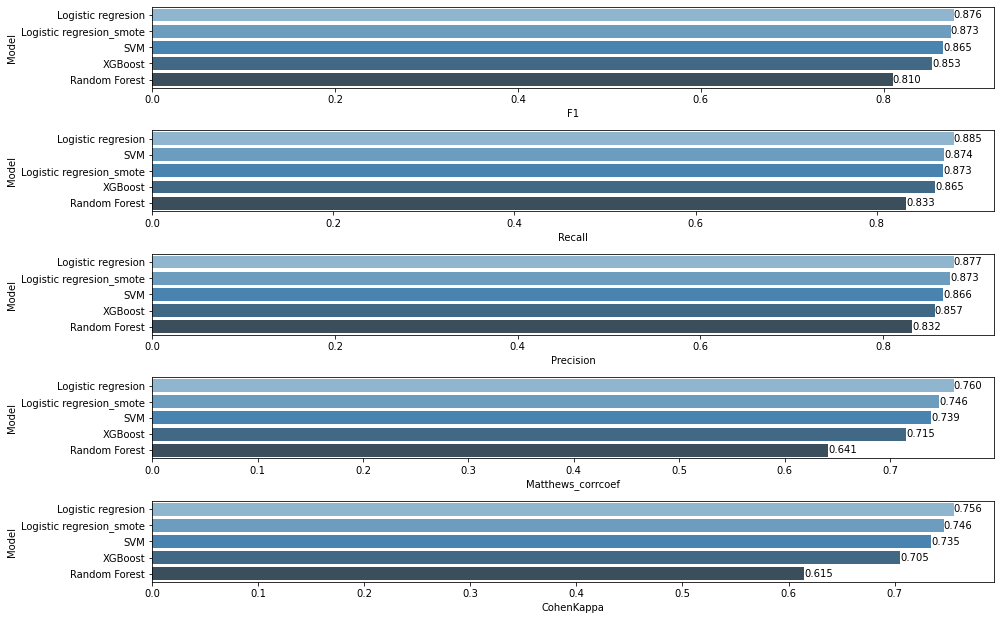

In [129]:
compare = pd.DataFrame(
    {
        "Model": [ "Logistic regresion", "SVM", "Random Forest", "XGBoost", "Logistic regresion_smote"],
        "F1": [lr_f1 ,svc_f1, rf_f1, xg_f1, lr_smote_f1],
        "Recall": [lr_recall ,svc_recall, rf_recall, xg_recall, lr_smote_recall],
        "Precision": [lr_precision ,svc_precision, rf_precision, xg_precision, lr_smote_precision],
        "Matthews_corrcoef": [mat_lr ,mat_svc, mat_rf, mat_xg, mat_lr_smote],
        "CohenKappa": [ck_lr ,ck_svc, ck_rf, ck_xg, ck_lr_smote],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(611)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(612)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(613)
compare = compare.sort_values(by="Precision", ascending=False)
ax = sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(614)
compare = compare.sort_values(by="Matthews_corrcoef", ascending=False)
ax = sns.barplot(x="Matthews_corrcoef", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(615)
compare = compare.sort_values(by="CohenKappa", ascending=False)
ax = sns.barplot(x="CohenKappa", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.tight_layout()  # Adjusts the spacing between subplots for better layout
plt.show()

In [131]:
# Results
compare

,Model,F1,Recall,Precision,Matthews_corrcoef,CohenKappa
0,Logistic regresion,0.876383,0.884749,0.877331,0.760220,0.755614
4,Logistic regresion_smote,0.873429,0.873484,0.873469,0.746478,0.746422
1,SVM,0.865092,0.874350,0.865733,0.738857,0.734716
3,XGBoost,0.853220,0.864818,0.856854,0.715037,0.705375
2,Random Forest,0.809865,0.832756,0.832207,0.641454,0.614694


# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

From the chart and Table above it is clearly seen that Logistic Regression model performs the best 

Explained Variance Ratio: [0.25947902 0.07742498 0.0735392  0.0665378  0.04877726 0.04326394
 0.04013732 0.03783623 0.03038915 0.02652631 0.02451881 0.02006849
 0.01849777 0.01814155 0.01610239 0.01485295 0.01396505 0.0126201
 0.01187998 0.01147409 0.01017871 0.00980683 0.00874388 0.0071729
 0.00619846 0.00613128 0.00587749 0.00528179 0.00487751 0.00433383
 0.00371542 0.0035299  0.00316429 0.00269218 0.00259495]


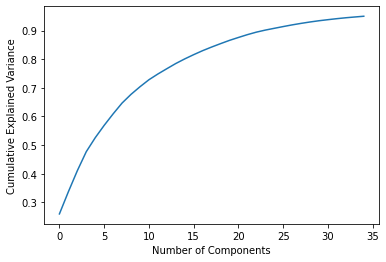

In [134]:
X_comp = X.copy()
y_comp = y.copy()

#normalize the data using minmax scaler
scaler = MinMaxScaler()
X_comp = scaler.fit_transform(X_comp)


# Create a PCA instance and fit it to the scaled data
pca = PCA(n_components=0.95)  # Choose the number of components that explain 95% of the variance
X_comp_pca = pca.fit_transform(X_comp)


# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')


cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [140]:
# Fit the best model on the entire dataset
grid_log_model.fit(X_comp_pca, y_comp)  # Replace X and y with your full dataset and corresponding labels
# Get the best parameters and best estimator
best_params = grid_log_model.best_params_
best_params

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

In [141]:
import joblib

# Assuming 'best_model' is your trained model and 'scaler' is your scaler
# Save the model
joblib.dump(grid_log_model, 'best_model.joblib')

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')

# Save the scaler
joblib.dump(X_comp_pca, 'X_pca_data.joblib')


['X_pca_data.joblib']

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>
